from https://dacon.io/competitions/official/235745/data

# 데이터 가져오기

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
!cp /gdrive/MyDrive/tmp/235745_parking_data.zip ./

In [ ]:
!rm -rf *.csv
!unzip 235745_parking_data.zip

Archive:  235745_parking_data.zip
  inflating: age_gender_info.csv     
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


# 데이터 로딩

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [ ]:
train_df.head(1)

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
0,C2483,900,아파트,경상북도,국민임대,39.72,134,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0


In [ ]:
test_df.head(1)

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수
0,C1072,754,아파트,경기도,국민임대,39.79,116,14.0,H,22830000,189840,0.0,2.0,683.0


컬럼 '등록차량수'가 예측하고자 하는 값이다.

In [ ]:
train_data_count = len(train_df)
test_data_count = len(test_df)

print(train_data_count, test_data_count)

2952 1022


# 데이터 합치기

test_df에 '등록차량수' 컬럼을 만들고 합친다.

In [ ]:
train_df[train_df.등록차량수==0].sum()

단지코드                            0.0
총세대수                            0.0
임대건물구분                          0.0
지역                              0.0
공급유형                            0.0
전용면적                            0.0
전용면적별세대수                        0.0
공가수                             0.0
자격유형                            0.0
임대보증금                           0.0
임대료                             0.0
도보 10분거리 내 지하철역 수(환승노선 수 반영)    0.0
도보 10분거리 내 버스정류장 수              0.0
단지내주차면수                         0.0
등록차량수                           0.0
dtype: float64

test_df에 컬럼 '등록차량수'를 추가하면서 값을 -1로 한다.

train_df에 0 값은 없는 것을 확인했다.

In [ ]:
test_df['등록차량수'] = 0

In [ ]:
print(len(train_df), len(test_df))
df = train_df.append(test_df)
print(len(df))

2952 1022
3974


# 결측치 처리

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3974 entries, 0 to 1021
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   단지코드                          3974 non-null   object 
 1   총세대수                          3974 non-null   int64  
 2   임대건물구분                        3974 non-null   object 
 3   지역                            3974 non-null   object 
 4   공급유형                          3974 non-null   object 
 5   전용면적                          3974 non-null   float64
 6   전용면적별세대수                      3974 non-null   int64  
 7   공가수                           3974 non-null   float64
 8   자격유형                          3972 non-null   object 
 9   임대보증금                         3225 non-null   object 
 10  임대료                           3225 non-null   object 
 11  도보 10분거리 내 지하철역 수(환승노선 수 반영)  3721 non-null   float64
 12  도보 10분거리 내 버스정류장 수            3970 non-null   float64
 13  단지내

In [ ]:
print(df.isnull().sum())

단지코드                              0
총세대수                              0
임대건물구분                            0
지역                                0
공급유형                              0
전용면적                              0
전용면적별세대수                          0
공가수                               0
자격유형                              2
임대보증금                           749
임대료                             749
도보 10분거리 내 지하철역 수(환승노선 수 반영)    253
도보 10분거리 내 버스정류장 수                4
단지내주차면수                           0
등록차량수                             0
dtype: int64


컬럼 3개 [ '임대보증금', '임대료', '도보 10분거리 내 지하철역 수(환승노선 수 반영)' ] 는 버리고,  

컬럼 '도보 10분거리 내 버스정류장 수'는 0으로 채운다.

## 결측치 3개 컬럼 삭제

In [ ]:
df.drop(columns=['임대보증금', '임대료', '도보 10분거리 내 지하철역 수(환승노선 수 반영)' ], inplace=True)

In [ ]:
print(df.isnull().sum())

단지코드                  0
총세대수                  0
임대건물구분                0
지역                    0
공급유형                  0
전용면적                  0
전용면적별세대수              0
공가수                   0
자격유형                  2
도보 10분거리 내 버스정류장 수    4
단지내주차면수               0
등록차량수                 0
dtype: int64


# 컬럼 '자격유형' 결측치 처리

In [ ]:
df.자격유형.value_counts()

A    2373
D     749
H     247
J     198
C     129
I      56
K      49
E      47
L      45
N      40
B      21
G      10
M       4
F       3
O       1
Name: 자격유형, dtype: int64

값 'A'가 가장 많다. 이 값으로 채우자.

In [ ]:
df = df.fillna(value={'자격유형':'A'})

In [ ]:
print(df.isnull().sum())
print()
print(df.자격유형.value_counts())

단지코드                  0
총세대수                  0
임대건물구분                0
지역                    0
공급유형                  0
전용면적                  0
전용면적별세대수              0
공가수                   0
자격유형                  0
도보 10분거리 내 버스정류장 수    4
단지내주차면수               0
등록차량수                 0
dtype: int64

A    2375
D     749
H     247
J     198
C     129
I      56
K      49
E      47
L      45
N      40
B      21
G      10
M       4
F       3
O       1
Name: 자격유형, dtype: int64


# 컬럼 '도보 10분거리 내 버스정류장 수' 결측치 처리

In [ ]:
df.fillna(value=0, inplace=True)

In [ ]:
print(df.isnull().sum())

단지코드                  0
총세대수                  0
임대건물구분                0
지역                    0
공급유형                  0
전용면적                  0
전용면적별세대수              0
공가수                   0
자격유형                  0
도보 10분거리 내 버스정류장 수    0
단지내주차면수               0
등록차량수                 0
dtype: int64


In [ ]:
df.head()

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
0,C2483,900,아파트,경상북도,국민임대,39.72,134,38.0,A,3.0,1425.0,1015.0
1,C2483,900,아파트,경상북도,국민임대,39.72,15,38.0,A,3.0,1425.0,1015.0
2,C2483,900,아파트,경상북도,국민임대,51.93,385,38.0,A,3.0,1425.0,1015.0
3,C2483,900,아파트,경상북도,국민임대,51.93,15,38.0,A,3.0,1425.0,1015.0
4,C2483,900,아파트,경상북도,국민임대,51.93,41,38.0,A,3.0,1425.0,1015.0


In [ ]:
value_columns = ['총세대수', '전용면적', '전용면적별세대수', '공가수', '도보 10분거리 내 버스정류장 수', '단지내주차면수', '등록차량수']

# 로그 처리

처리할 컬럼은 '전용면적별세대수' 하나이다.

총세대수


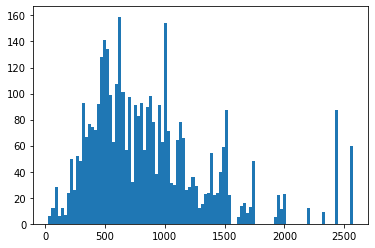

전용면적


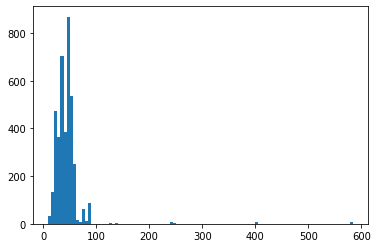

전용면적별세대수


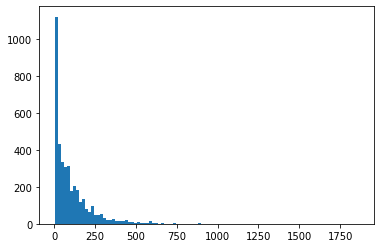

공가수


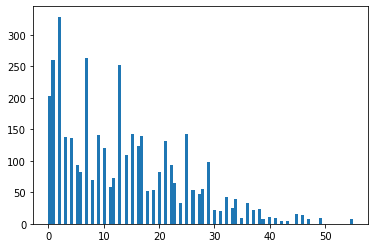

도보 10분거리 내 버스정류장 수


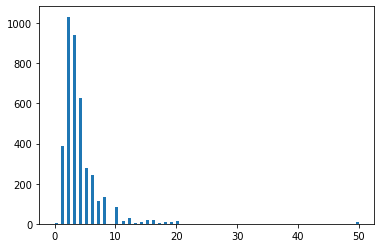

단지내주차면수


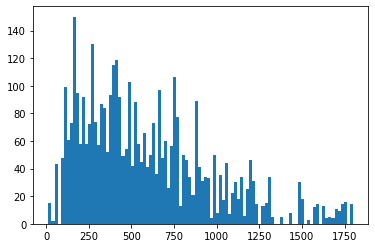

등록차량수


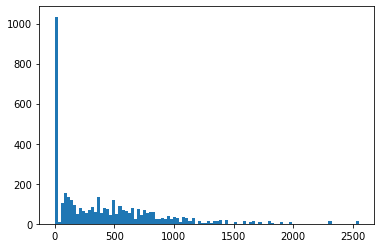

In [ ]:
for column_name in value_columns:
    print(column_name)
    plt.hist(df[column_name], bins=100)
    plt.show()

전용면적별세대수


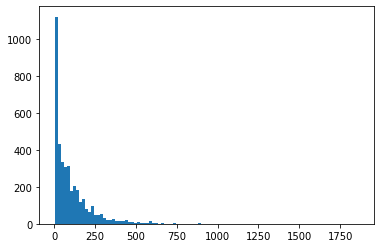

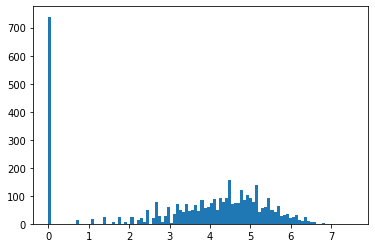

In [ ]:
log_columns = ['전용면적별세대수']

for column_name in log_columns:
    print(column_name)
    plt.hist(df[column_name], bins=100)
    plt.show()    
    df['log_'+column_name] = np.log(df[column_name])
    plt.hist(df['log_'+column_name], bins=100)
    plt.show()    

to_be_removed_columns.extend(log_columns)    

# 이상치 처리

총세대수


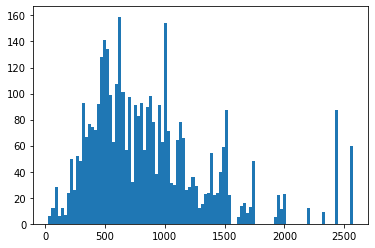

전용면적


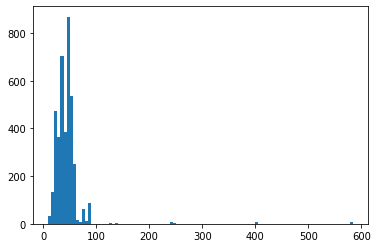

전용면적별세대수


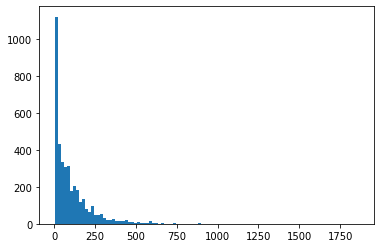

공가수


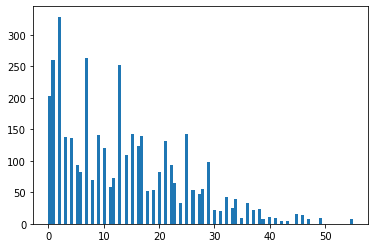

도보 10분거리 내 버스정류장 수


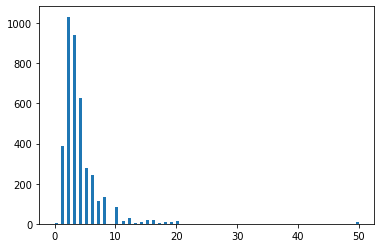

단지내주차면수


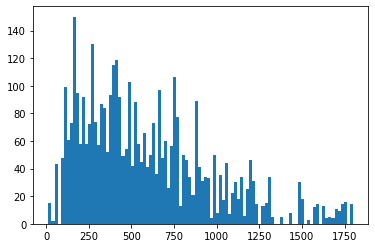

등록차량수


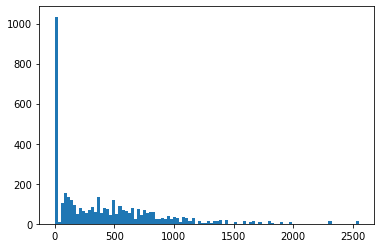

In [ ]:
for column_name in value_columns:
    print(column_name)
    plt.hist(df[column_name], bins=100)
    plt.show()

In [ ]:
max_values = {
    '전용면적':100,
    '공가수':40,
    '도보 10분거리 내 버스정류장 수':10,
}

전용면적 100


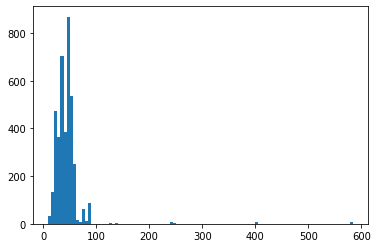

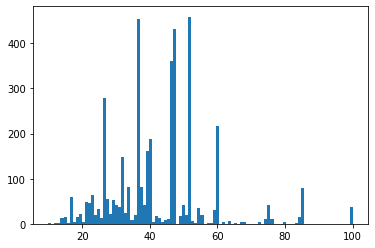

공가수 40


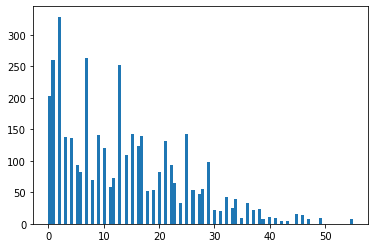

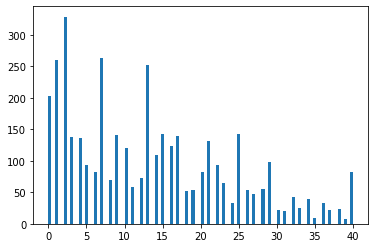

도보 10분거리 내 버스정류장 수 10


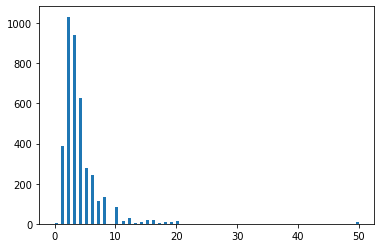

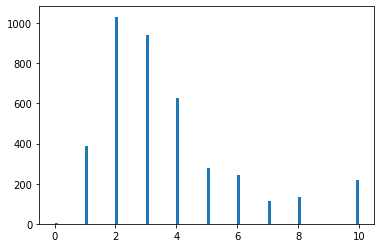

In [ ]:
for column_name, max_value in max_values.items():
    print(column_name, max_value)
    plt.hist(df[column_name], bins=100)
    plt.show()        
    new_column_name = "max_limited_"+column_name
    df[new_column_name] = df[column_name]
    df.loc[df[new_column_name]>max_value, new_column_name] = max_value
    plt.hist(df[new_column_name], bins=100)
    plt.show()    
    to_be_removed_columns.append(column_name)    

# 카테고리성 데이터 처리

category_columns = ['단지코드', '임대건물구분', '지역', '공급유형', '자격유형']

In [ ]:
category_columns = ['단지코드', '임대건물구분', '지역', '공급유형', '자격유형']

In [ ]:
for column_name in category_columns:
    df[column_name] = df[column_name].astype('category')
    df[column_name+'_code'] = df[column_name].cat.codes

to_be_removed_columns.extend(category_columns)

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3974 entries, 0 to 1021
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   단지코드                            3974 non-null   category
 1   총세대수                            3974 non-null   int64   
 2   임대건물구분                          3974 non-null   category
 3   지역                              3974 non-null   category
 4   공급유형                            3974 non-null   category
 5   전용면적                            3974 non-null   float64 
 6   전용면적별세대수                        3974 non-null   int64   
 7   공가수                             3974 non-null   float64 
 8   자격유형                            3974 non-null   category
 9   도보 10분거리 내 버스정류장 수              3974 non-null   float64 
 10  단지내주차면수                         3974 non-null   float64 
 11  등록차량수                           3974 non-null   float64 
 12  log_전용면적별세대수        

# 카테고리 컬럼을 one-hot인코딩

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3974 entries, 0 to 1021
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   단지코드                            3974 non-null   category
 1   총세대수                            3974 non-null   int64   
 2   임대건물구분                          3974 non-null   category
 3   지역                              3974 non-null   category
 4   공급유형                            3974 non-null   category
 5   전용면적                            3974 non-null   float64 
 6   전용면적별세대수                        3974 non-null   int64   
 7   공가수                             3974 non-null   float64 
 8   자격유형                            3974 non-null   category
 9   도보 10분거리 내 버스정류장 수              3974 non-null   float64 
 10  단지내주차면수                         3974 non-null   float64 
 11  등록차량수                           3974 non-null   float64 
 12  log_전용면적별세대수        

In [ ]:
for category_name in category_columns:
    column_name = category_name+'_code'
    df = pd.get_dummies(df, columns = [column_name])

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3974 entries, 0 to 1021
Columns: 632 entries, 단지코드 to 자격유형_code_14
dtypes: category(5), float64(9), int64(2), uint8(616)
memory usage: 2.7 MB
None


# 불필요한 컬럼 삭제

In [ ]:
df.drop(columns=to_be_removed_columns, inplace=True)

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3974 entries, 0 to 1021
Columns: 623 entries, 총세대수 to 자격유형_code_14
dtypes: float64(6), int64(1), uint8(616)
memory usage: 2.6 MB
None


# Normalization

In [ ]:
y_df = df['등록차량수']
x_df = df.drop(columns=['등록차량수'])

In [ ]:
x_df = (x_df - x_df.min()) / (x_df.max() - x_df.min())

In [ ]:
print(len(y_df))
print(y_df.value_counts())

3974
0.0      1022
359.0      61
172.0      48
62.0       44
116.0      40
         ... 
149.0       2
873.0       2
73.0        2
16.0        1
386.0       1
Name: 등록차량수, Length: 355, dtype: int64


In [ ]:
y_min = y_df.min()
y_max = y_df.max()
y_df = (y_df - y_min) / (y_max - y_min)

# numpy 로 변환

In [ ]:
 x = x_df.to_numpy()
 y = y_df.to_numpy()

 print(x.shape)
 print(y.shape)

(3974, 622)
(3974,)


# train / test 분리

In [ ]:
train_x, test_x = x[:train_data_count], x[:test_data_count]
train_y, test_y = y[:train_data_count], y[:test_data_count]

# 모델 학습

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 32)                19936     
                                                                 
 dense_22 (Dense)            (None, 10)                330       
                                                                 
 dense_23 (Dense)            (None, 1)                 11        
                                                                 
Total params: 20,277
Trainable params: 20,277
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
21/21 [==============================] - 1s 11ms/step - loss: 0.0474 - mae: 0.1694 - val_loss: 0.0456 - val_mae: 0.1585
Epoch 2/1000
21/21 [==============================] - 0s 3ms/step - loss: 0.0344 - mae: 0.1407 - val_loss: 0.0421 - val_mae: 0.1557
Epoch 3/1000
21/21 [=============================

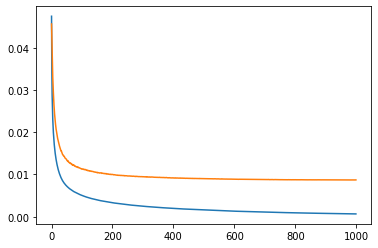

32/32 [==============================] - 0s 1ms/step - loss: 4.6027e-04 - mae: 0.0126
loss= 0.000460268696770072
mae= 0.012622621841728687


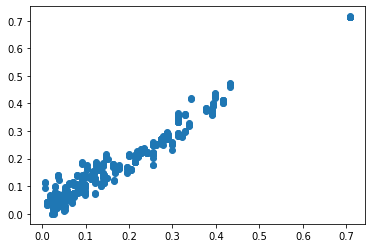

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

model = keras.Sequential()
model.add(Dense(32, activation='relu', input_shape=(train_x.shape[-1],)))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()

from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',  # 모니터링 대상
    verbose=1,
    patience=50)         # 중지까지의 여유분

history = model.fit(train_x, train_y, epochs=1000, verbose=1, batch_size=128, validation_split=0.1,
                    callbacks=[early_stopping])

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()



loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)

y_ = model.predict(test_x)

plt.scatter(test_y, y_)
plt.show()

# submision 파일 파악

In [ ]:
!head sample_submission.csv

code,num
C1072,0
C1128,0
C1456,0
C1840,0
C1332,0
C1563,0
C1794,0
C1640,0
C1377,0


In [ ]:
!head test.csv

단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수
C1072,754,아파트,경기도,국민임대,39.79,116,14.0,H,22830000,189840,0.0,2.0,683.0
C1072,754,아파트,경기도,국민임대,46.81,30,14.0,A,36048000,249930,0.0,2.0,683.0
C1072,754,아파트,경기도,국민임대,46.9,112,14.0,H,36048000,249930,0.0,2.0,683.0
C1072,754,아파트,경기도,국민임대,46.9,120,14.0,H,36048000,249930,0.0,2.0,683.0
C1072,754,아파트,경기도,국민임대,51.46,60,14.0,H,43497000,296780,0.0,2.0,683.0
C1072,754,아파트,경기도,국민임대,51.71,51,14.0,H,43497000,296780,0.0,2.0,683.0
C1072,754,아파트,경기도,국민임대,51.96,198,14.0,H,43497000,296780,0.0,2.0,683.0
C1072,754,아파트,경기도,국민임대,51.96,67,14.0,H,43497000,296780,0.0,2.0,683.0
C1128,1354,아파트,경기도,국민임대,39.79,368,9.0,H,22830000,189840,0.0,3.0,1216.0


In [ ]:
!wc sample_submission.csv
!wc test.csv

 151  151 1360 sample_submission.csv
 1023  1033 92574 test.csv


# 예측값 구하기

In [ ]:
y_ = model.predict(test_x)
recovered_y = y_ * (y_max - y_min) + y_min

In [ ]:
test_df['등록차량수'] = recovered_y

In [ ]:
result_df = test_df.groupby('단지코드').mean()

In [ ]:
result_df.head()

,총세대수,전용면적,전용면적별세대수,공가수,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
단지코드,,,,,,,,
C1003,480.0,32.136250,60.000000,29.0,0.0,3.0,339.0,593.543274
C1006,1505.0,60.894074,55.740741,27.0,2.0,5.0,428.0,358.354156
C1016,643.0,48.142500,160.750000,4.0,1.0,4.0,646.0,181.435715
C1019,321.0,44.875000,80.250000,7.0,0.0,3.0,259.0,361.345551
C1030,75.0,26.338333,11.666667,12.0,1.0,2.0,29.0,691.542236


In [ ]:
result_df = result_df.reset_index()

In [ ]:
result_df = result_df[['단지코드', '등록차량수']]

In [ ]:
result = result_df.to_numpy()
print(result.shape)
print(result[:5])

(150, 2)
[['C1003' 593.5432739257812]
 ['C1006' 358.3541564941406]
 ['C1016' 181.4357147216797]
 ['C1019' 361.3455505371094]
 ['C1030' 691.542236328125]]


In [ ]:
result_map = {}
for code, value in result:
    result_map[code] = value

print(result_map)

{'C1003': 593.5432739257812, 'C1006': 358.3541564941406, 'C1016': 181.4357147216797, 'C1019': 361.3455505371094, 'C1030': 691.542236328125, 'C1038': 567.3705444335938, 'C1040': 94.2635498046875, 'C1060': 105.29673767089844, 'C1064': 356.01220703125, 'C1071': 183.193115234375, 'C1072': 1040.731689453125, 'C1083': 63.97077178955078, 'C1105': 103.86872863769531, 'C1128': 578.0869750976562, 'C1135': 251.78712463378906, 'C1147': 196.21128845214844, 'C1149': 349.9556884765625, 'C1152': 142.06765747070312, 'C1158': 352.3078918457031, 'C1166': 161.62319946289062, 'C1189': 145.1387939453125, 'C1215': 339.6573486328125, 'C1216': 303.0070495605469, 'C1225': 73.33976745605469, 'C1229': 527.1747436523438, 'C1239': 102.85289001464844, 'C1250': 338.8074035644531, 'C1253': 166.16458129882812, 'C1266': 469.94854736328125, 'C1267': 450.0345153808594, 'C1282': 383.7674560546875, 'C1289': 1180.7105712890625, 'C1294': 108.57577514648438, 'C1297': 144.9384307861328, 'C1311': 54.112491607666016, 'C1318': 628

# submission 파일 읽기

In [ ]:
submission_df = pd.read_csv("sample_submission.csv")

In [ ]:
submission_df.head()

,code,num
0,C1072,0
1,C1128,0
2,C1456,0
3,C1840,0
4,C1332,0


# submission 값 채우기

In [ ]:
submission_code = submission_df.code.to_numpy()

submission = []

for code in submission_code:
    submission.append([code, result_map[code]])

submission = np.array(submission)

submission_df = pd.DataFrame(submission, columns=["code", "num"])

submission_df.head()

,code,num
0,C1072,1040.731689453125
1,C1128,578.0869750976562
2,C1456,1123.6798095703125
3,C1840,721.0885620117188
4,C1332,586.2576293945312


# submission 파일 저장

In [ ]:
submission_df.to_csv("submission.csv", index=False)

In [ ]:
!head submission.csv

code,num
C1072,1040.731689453125
C1128,578.0869750976562
C1456,1123.6798095703125
C1840,721.0885620117188
C1332,586.2576293945312
C1563,1348.2965087890625
C1794,1814.7891845703125
C1640,702.015869140625
C1377,715.75


In [ ]:
!head sample_submission.csv

code,num
C1072,0
C1128,0
C1456,0
C1840,0
C1332,0
C1563,0
C1794,0
C1640,0
C1377,0
